In [66]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import mlrose_hiive

In [67]:
# fix random seed for reproducibility
np.random.seed(5)

In [68]:
data = 'data/heart.csv'
df = pd.read_csv(data)
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [69]:
X = df.drop(columns=['target'])
y = df['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [70]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [71]:
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [8], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 100, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

In [72]:
nn_model1.fit(x_train, y_train)

NeuralNetwork(activation='sigmoid', clip_max=5, early_stopping=True,
              hidden_nodes=[8], learning_rate=0.01, max_attempts=100,
              random_state=3)

### Check the training and test accuracy before parameters tunning

In [74]:
y_train_pred = nn_model1.predict(x_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = nn_model1.predict(x_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_train_accuracy)
print(y_test_accuracy)

0.45754716981132076
0.45054945054945056


### Plot the learning curves

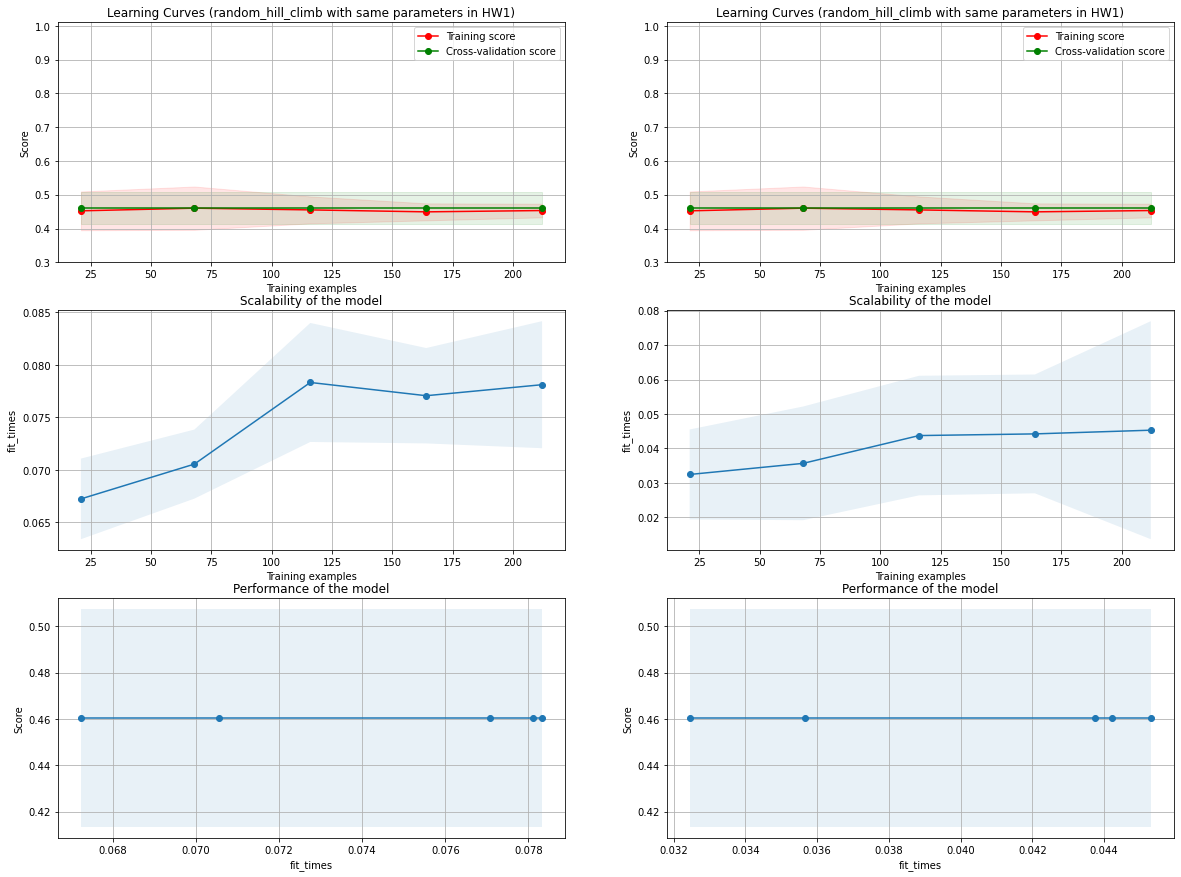

In [90]:
#predicted = model.predict(x_test)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):


    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")
    
     # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


   
    return plt


fig, axes = plt.subplots(3, 2, figsize=(20, 15))



title = r"Learning Curves (random_hill_climb with same parameters in HW1)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

estimator = mlrose_hiive.NeuralNetwork(hidden_nodes = [8], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 100, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.3, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (random_hill_climb with same parameters in HW1)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = mlrose_hiive.NeuralNetwork(hidden_nodes = [8], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 100, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 10, random_state = 3)

plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.3, 1.01), cv=cv, n_jobs=4
)

plt.show()

### Hyperparameters tuning using GridSearchCV

#### Step Size
#### Clip_max
#### max_iters
#### Number of hidden nodes

In [77]:
model = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 2, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)
learning_rate = [0.001, 0.01, 0.1, 1, 2, 5, 8, 10]
param_grid = dict(learning_rate=learning_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.674380 using {'learning_rate': 2}
0.528102 (0.029973) with: {'learning_rate': 0.001}
0.580013 (0.026895) with: {'learning_rate': 0.01}
0.561234 (0.031550) with: {'learning_rate': 0.1}
0.641449 (0.024737) with: {'learning_rate': 1}
0.674380 (0.025082) with: {'learning_rate': 2}
0.608518 (0.012202) with: {'learning_rate': 5}
0.650838 (0.082025) with: {'learning_rate': 8}
0.631858 (0.103051) with: {'learning_rate': 10}


#### Best Step size = 2

In [79]:
model = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 2, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)
clip_max = [1, 2, 5, 10, 15, 20, 25, 30]
param_grid = dict(clip_max=clip_max)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.674380 using {'clip_max': 5}
0.603756 (0.057561) with: {'clip_max': 1}
0.537559 (0.068599) with: {'clip_max': 2}
0.674380 (0.025082) with: {'clip_max': 5}
0.650973 (0.012300) with: {'clip_max': 10}
0.655600 (0.046874) with: {'clip_max': 15}
0.660228 (0.061703) with: {'clip_max': 20}
0.617975 (0.009445) with: {'clip_max': 25}
0.608585 (0.015258) with: {'clip_max': 30}


#### Best Clip_max = 5

In [84]:
model = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 2, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)
max_iters = [10, 100, 1000, 10000]
param_grid = dict(max_iters=max_iters)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.674380 using {'max_iters': 1000}
0.490476 (0.014645) with: {'max_iters': 10}
0.565728 (0.046831) with: {'max_iters': 100}
0.674380 (0.025082) with: {'max_iters': 1000}
0.674380 (0.025082) with: {'max_iters': 10000}


#### max_iters = 1000

In [87]:
model = mlrose_hiive.NeuralNetwork(hidden_nodes = [8], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 2, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)
hidden_nodes = [[2], [4], [8], [16], [32], [64]]
param_grid = dict(hidden_nodes=hidden_nodes)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.674380 using {'hidden_nodes': [2]}
0.674380 (0.025082) with: {'hidden_nodes': [2]}
0.622334 (0.069304) with: {'hidden_nodes': [4]}
0.603488 (0.071723) with: {'hidden_nodes': [8]}
0.664588 (0.076840) with: {'hidden_nodes': [16]}
0.645674 (0.100810) with: {'hidden_nodes': [32]}
0.626962 (0.066056) with: {'hidden_nodes': [64]}


#### Number of hidden nodes = 2

### Plot learning curves using the tuned hyperparameters

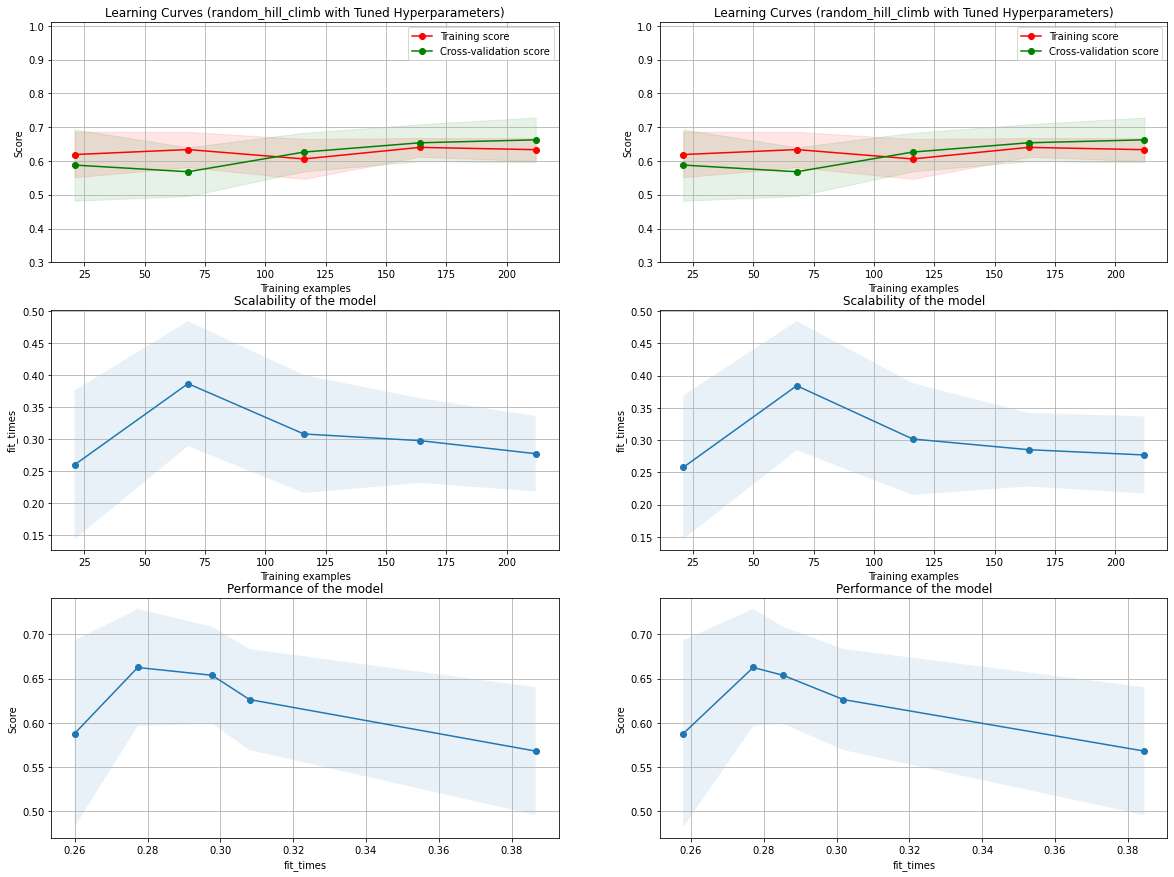

In [89]:
#predicted = model.predict(x_test)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):


    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")
    
     # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


   
    return plt


fig, axes = plt.subplots(3, 2, figsize=(20, 15))



title = r"Learning Curves (random_hill_climb with Tuned Hyperparameters)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

estimator = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 2, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.3, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (random_hill_climb with Tuned Hyperparameters)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 2, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.3, 1.01), cv=cv, n_jobs=4
)

plt.show()